<a href="https://colab.research.google.com/github/GullinoAgus/TP02-RNII-Attention/blob/main/TP2_NLP_RN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de texto

Utilizaremos el dataset Twenty News Groups

In [1]:
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt
from collections import Counter
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import gensim
import os, re, csv, math, codecs

In [2]:
from pprint import pprint
pprint(newsgroups_train.target_names)
pprint(newsgroups_train.target)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
array([7, 4, 4, ..., 3, 1, 8])


In [3]:
print(newsgroups_train.data[16])

From: ab@nova.cc.purdue.edu (Allen B)
Subject: Re: TIFF: philosophical significance of 42
Organization: Purdue University
Lines: 39

In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin  
Preston) writes:
> Why not use the PD C library for reading/writing TIFF files? It took me a
> good 20 minutes to start using them in your own app.

I certainly do use it whenever I have to do TIFF, and it usually works
very well.  That's not my point.  I'm >philosophically< opposed to it
because of its complexity.

This complexity has led to some programs' poor TIFF writers making
some very bizarre files, other programs' inability to load TIFF
images (though they'll save them, of course), and a general
inability to interchange images between different environments
despite the fact they all think they understand TIFF.

As the saying goes, "It's not me I'm worried about- it's all the
>other<  assholes out there!"  I've had big trouble with misuse and
abuse of TIFF over the years, 

In [4]:
token=Tokenizer(num_words=30000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token="UNK", document_count=0)

In [5]:
token.fit_on_texts(newsgroups_train.data)

In [6]:
train_sequences=token.texts_to_sequences(newsgroups_train.data)
test_sequences=token.texts_to_sequences(newsgroups_test.data)


In [7]:
train_sequences[0]

[15,
 1,
 4309,
 1351,
 16,
 11127,
 39,
 251,
 30,
 43,
 299,
 10,
 18,
 96,
 79,
 92,
 23734,
 4309,
 1351,
 16,
 35,
 78,
 4,
 2953,
 611,
 1768,
 33,
 212,
 9,
 27,
 1309,
 28,
 172,
 67,
 48,
 124,
 9880,
 64,
 17,
 18,
 299,
 9,
 709,
 2,
 87,
 264,
 12,
 27,
 5,
 37,
 1498,
 2267,
 299,
 1163,
 3,
 19,
 15,
 2,
 1348,
 13638,
 844,
 15449,
 12,
 27,
 338,
 5,
 1,
 2,
 4018,
 81,
 183,
 485,
 8,
 1377,
 2,
 845,
 8165,
 27,
 1836,
 15,
 2,
 817,
 4,
 2,
 727,
 18,
 10,
 45,
 9,
 89,
 28,
 172,
 40,
 1,
 5,
 829,
 274,
 1079,
 2909,
 199,
 4,
 2805,
 154,
 18,
 299,
 10,
 240,
 629,
 26,
 809,
 358,
 14,
 22,
 17,
 18,
 21901,
 385,
 299,
 182,
 113,
 189,
 207,
 1499,
 1342,
 3,
 14,
 36,
 59,
 7861,
 1]

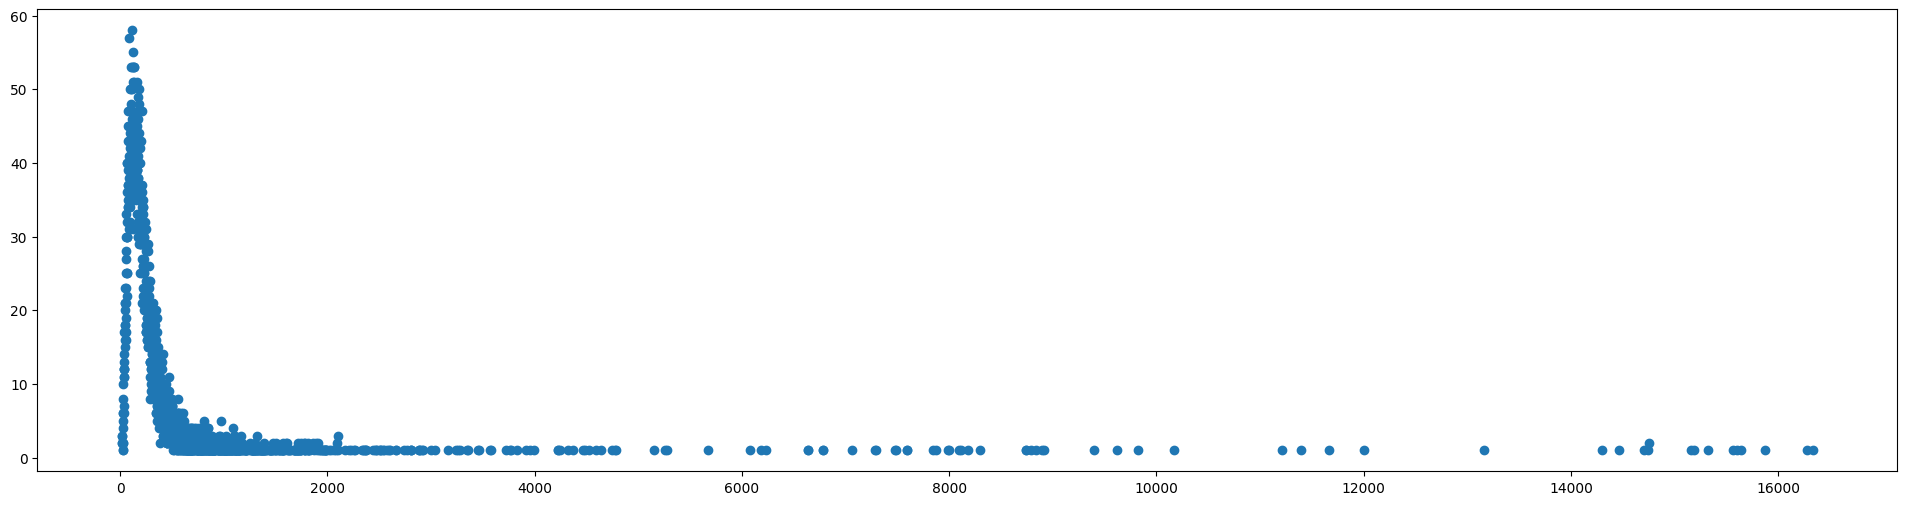

In [8]:
lengths=[len(seq) for seq in train_sequences]
lengths=dict(Counter(lengths))
plt.figure(figsize=[24,6])
plt.scatter(list(lengths.keys()), list(lengths.values()))
plt.show()

In [9]:
max_len=500
train_sequences=pad_sequences(train_sequences,maxlen=max_len)
test_sequences=pad_sequences(test_sequences,maxlen=max_len)


In [10]:
train_sequences[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [81]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip -y

--2023-10-01 09:58:15--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.78, 13.226.210.111, 13.226.210.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip.1’

wiki-news-300d-1M.v 100%[===================>] 650.22M   135MB/s    in 7.2s    

2023-10-01 09:58:23 (90.1 MB/s) - ‘wiki-news-300d-1M.vec.zip.1’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
caution: filename not matched:  -y


In [11]:
reverse_dictionary = token.index_word
dictionary = dict([(value, key) for (key, value) in reverse_dictionary.items()])


In [12]:
token.index_word

{1: 'UNK',
 2: 'the',
 3: 'to',
 4: 'of',
 5: 'a',
 6: "'ax",
 7: 'and',
 8: 'in',
 9: 'i',
 10: 'is',
 11: 'that',
 12: 'it',
 13: 'for',
 14: 'you',
 15: 'from',
 16: 'edu',
 17: 'on',
 18: 'this',
 19: 'be',
 20: 'are',
 21: 'not',
 22: 'have',
 23: 'with',
 24: 'as',
 25: '1',
 26: 'or',
 27: 'was',
 28: 'if',
 29: 'but',
 30: 'subject',
 31: 'they',
 32: 'com',
 33: 'lines',
 34: 'at',
 35: 'organization',
 36: 'by',
 37: '2',
 38: 'an',
 39: 'my',
 40: 'can',
 41: 'x',
 42: '3',
 43: 'what',
 44: '0',
 45: 'all',
 46: 'will',
 47: 'm',
 48: 'there',
 49: 'would',
 50: 'one',
 51: 'do',
 52: "'",
 53: 'about',
 54: 're',
 55: 'we',
 56: 'writes',
 57: 'so',
 58: 'he',
 59: 'your',
 60: 'no',
 61: 'has',
 62: 'article',
 63: 'any',
 64: 'me',
 65: 'some',
 66: 'who',
 67: 'out',
 68: 'which',
 69: '4',
 70: 'q',
 71: 'more',
 72: 'like',
 73: 'people',
 74: "don't",
 75: 'when',
 76: '5',
 77: 'just',
 78: 'university',
 79: 'posting',
 80: 'their',
 81: 'were',
 82: 'up',
 83: 'r'

In [13]:
#load embeddings
EMBEDDING_DIR = "/content/"
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open(EMBEDDING_DIR+'wiki-news-300d-1M.vec', encoding='utf-8')
for line in f:
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_index))

loading word embeddings...
found 625283 word vectors


In [14]:
embeddings_index["car"]

array([-1.600e-02, -3.000e-04, -1.684e-01,  8.990e-02, -2.000e-02,
       -9.300e-03,  4.820e-02, -3.080e-02, -4.510e-02,  6.000e-04,
        1.680e-01,  9.650e-02,  3.061e-01, -4.110e-02,  2.960e-02,
       -4.630e-02,  3.250e-02, -7.030e-02,  2.220e-02, -1.404e-01,
       -2.638e-01, -1.340e-02,  1.277e-01,  1.227e-01,  1.803e-01,
       -1.920e-02,  3.530e-02,  1.214e-01,  1.509e-01, -8.610e-02,
        9.760e-02, -2.550e-02, -2.760e-02, -1.556e-01, -7.390e-02,
        5.430e-02, -6.700e-02, -3.000e-03,  1.515e-01,  6.080e-02,
        3.300e-02,  7.470e-02,  9.000e-04,  5.500e-02,  4.800e-03,
       -1.320e-02, -2.620e-02, -1.804e-01,  8.050e-02,  4.640e-02,
       -1.590e-02, -3.020e-02, -6.785e-01,  1.632e-01,  1.030e-02,
        6.550e-02, -8.430e-02,  2.270e-02,  3.350e-02, -3.560e-02,
       -6.380e-02, -1.111e-01, -1.700e-03,  9.780e-02,  5.650e-02,
       -3.520e-02,  3.950e-02,  1.867e-01,  7.900e-02, -1.234e-01,
        1.860e-02,  8.900e-02,  1.631e-01,  7.830e-02,  5.610e

In [15]:
embed_dim=300
num_words=len(dictionary)+1
embedding_matrix=np.zeros([num_words,embed_dim])
for word, idx in dictionary.items():
  if idx <= num_words and word in embeddings_index:
    embedding_matrix[idx,:]=embeddings_index[word]

In [16]:
from tensorflow.keras.utils import plot_model

# Embeddings + Attention + CNN

In [53]:
from tensorflow.keras.layers import Embedding, Reshape, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input, Concatenate,Dot,RepeatVector,TimeDistributed,Multiply,Lambda,Flatten, Activation, BatchNormalization
import tensorflow.keras.backend as K
from tensorflow.keras.activations import softmax
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

def softMaxOverTime(x):
    return softmax(x,axis=1)


nb_words=num_words

value_dim=64
# Palabras de entrada
input_layer = Input(shape=(max_len,))

# Embedding
embedding_layer=Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(input_layer)

# Convolucional para contextualizar
conv_out=Conv1D(value_dim,2,padding="same", activation='tanh')(embedding_layer)
conv_out=Conv1D(value_dim,4,padding="same", activation='tanh')(embedding_layer)
conv_out=Conv1D(value_dim,8, padding="same", activation='tanh')(conv_out)
# conv_out=Dense(value_dim, activation='tanh')(conv_out)

# Densa cuyos pesos son la query, a la salida estan los scores
ulog_attention=Dense(1,activation="linear")(conv_out)

# Softmax para calcular alfas
attention=Activation(softMaxOverTime)(ulog_attention)

# Repito los alfas para hacer el producto despues
repeated_attention=TimeDistributed(RepeatVector(value_dim))(attention)
repeated_attention=Reshape([max_len,value_dim])(repeated_attention)

# Producto de los alfas con las keys para dar un pesado inicial
weighted_embeddings=Multiply()([repeated_attention,conv_out])

# Suma de las llaves pesadas
embedding_sum = Lambda(lambda x: K.sum(x, axis=1))(weighted_embeddings)

# Capa Densa final y luego la softmax
dense1=Dense(100, activation='relu')(embedding_sum)
dense1=Dense(200, activation='relu')(dense1)
dense2=Dense(20, activation='softmax')(dense1)
model=Model(input_layer , dense2)
adam = optimizers.Nadam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [54]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 500)]                0         []                            
                                                                                                  
 embedding_10 (Embedding)    (None, 500, 300)             4024320   ['input_11[0][0]']            
                                                          0                                       
                                                                                                  
 conv1d_29 (Conv1D)          (None, 500, 64)              76864     ['embedding_10[0][0]']        
                                                                                                  
 conv1d_30 (Conv1D)          (None, 500, 64)              32832     ['conv1d_29[0][0]']     

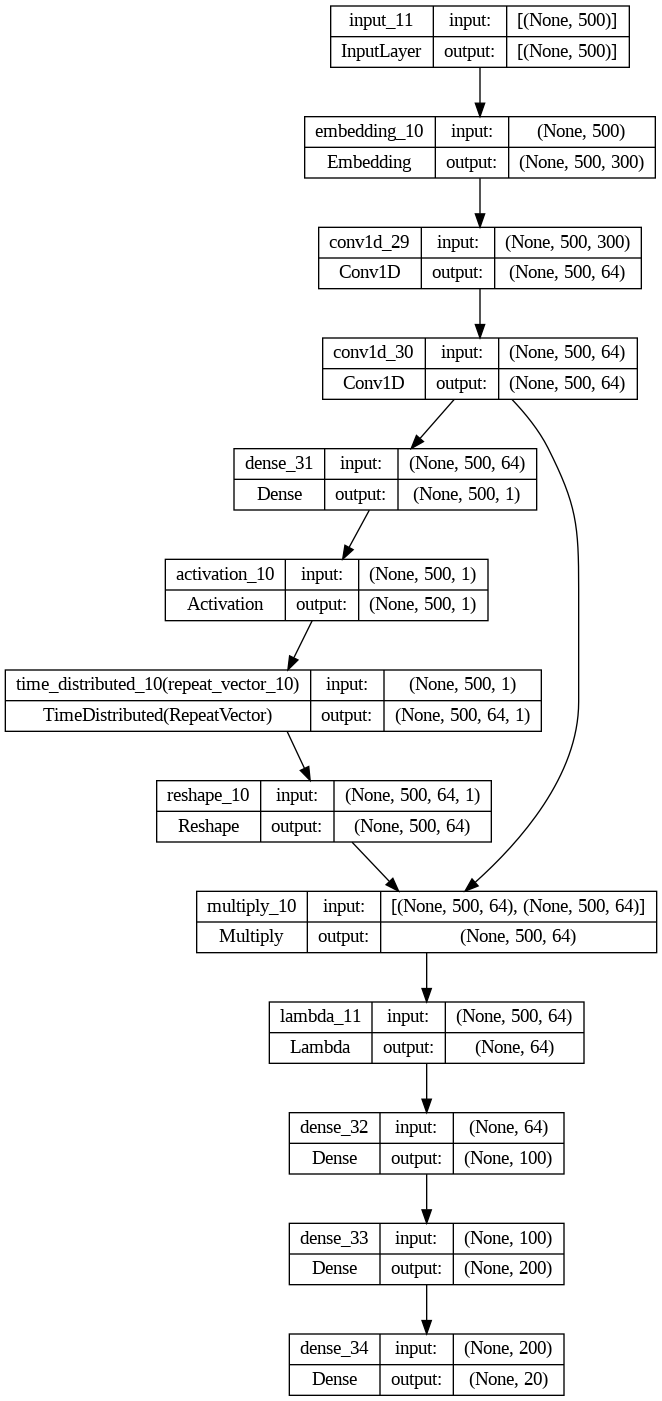

In [55]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [56]:
model.fit(train_sequences, newsgroups_train.target,batch_size=128,epochs=50,validation_split=0.2)

Epoch 1/50
71/71 [==============================] - 28s 316ms/step - loss: 2.2679 - accuracy: 0.2730 - val_loss: 1.3074 - val_accuracy: 0.5502
Epoch 2/50
71/71 [==============================] - 16s 227ms/step - loss: 0.8222 - accuracy: 0.7386 - val_loss: 0.6744 - val_accuracy: 0.8029
Epoch 3/50
71/71 [==============================] - 15s 207ms/step - loss: 0.2651 - accuracy: 0.9242 - val_loss: 0.5940 - val_accuracy: 0.8325
Epoch 4/50
71/71 [==============================] - 13s 185ms/step - loss: 0.0823 - accuracy: 0.9808 - val_loss: 0.6744 - val_accuracy: 0.8259
Epoch 5/50
71/71 [==============================] - 15s 208ms/step - loss: 0.0319 - accuracy: 0.9939 - val_loss: 0.6882 - val_accuracy: 0.8431
Epoch 6/50
71/71 [==============================] - 15s 212ms/step - loss: 0.0159 - accuracy: 0.9970 - val_loss: 0.7873 - val_accuracy: 0.8378
Epoch 7/50
71/71 [==============================] - 19s 269ms/step - loss: 0.0094 - accuracy: 0.9987 - val_loss: 0.7476 - val_accuracy: 0.8493

KeyboardInterrupt: ignored

Este modelo simple con un contextualizador normalito de CNN anda, me costo pero llego a mejorarse un poco.

# Embeddings + TextCNN + Attention

In [45]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input, Concatenate,Dot,RepeatVector,TimeDistributed,Multiply,Lambda,Flatten, BatchNormalization
import tensorflow.keras.backend as K
from tensorflow.keras.activations import softmax
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

def softMaxOverTime(x):
    return softmax(x,axis=1)


nb_words=num_words
num_filters=128
value_dim = 100

# Palabras de entrada
input_layer = Input(shape=(max_len,))

# Embedding
embedding_layer=Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(input_layer)

# TextCNN para contextualizacion
conv5=Conv1D(num_filters, 16, padding='same')(embedding_layer)
conv4=Conv1D(num_filters, 8, padding='same')(embedding_layer)
conv3=Conv1D(num_filters, 4, padding='same')(embedding_layer)
conv2=Conv1D(num_filters, 2, padding='same')(embedding_layer)

added = Lambda(lambda x: K.sum(x, axis=0))([conv5, conv4, conv3, conv2])

# conv_out = Conv1D(value_dim, 8, activation='tanh', padding='same')(added)
conv_out = Dense(value_dim, activation='tanh')(added)

# Densa cuyos pesos son la query, a la salida estan los scores
ulog_attention=Dense(1,activation="linear")(conv_out)

# Softmax para calcular alfas
attention=Activation(softMaxOverTime)(ulog_attention)

# Repito los alfas para hacer el producto despues
repeated_attention=TimeDistributed(RepeatVector(value_dim))(attention)
repeated_attention=Reshape([max_len,value_dim])(repeated_attention)

# Producto de los alfas con las keys para dar un pesado inicial
weighted_embeddings=Multiply()([repeated_attention,conv_out])

# Suma de las llaves pesadas
embedding_sum = Lambda(lambda x: K.sum(x, axis=1))(weighted_embeddings)

# Capa Densa final y luego la softmax
dense1=Dense(100, activation='relu')(embedding_sum)
dense2=Dense(20, activation='softmax')(dense1)
model=Model(input_layer , dense2)
adam = optimizers.Nadam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])



In [46]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 500)]                0         []                            
                                                                                                  
 embedding_9 (Embedding)     (None, 500, 300)             4024320   ['input_10[0][0]']            
                                                          0                                       
                                                                                                  
 conv1d_24 (Conv1D)          (None, 500, 128)             614528    ['embedding_9[0][0]']         
                                                                                                  
 conv1d_25 (Conv1D)          (None, 500, 128)             307328    ['embedding_9[0][0]']   

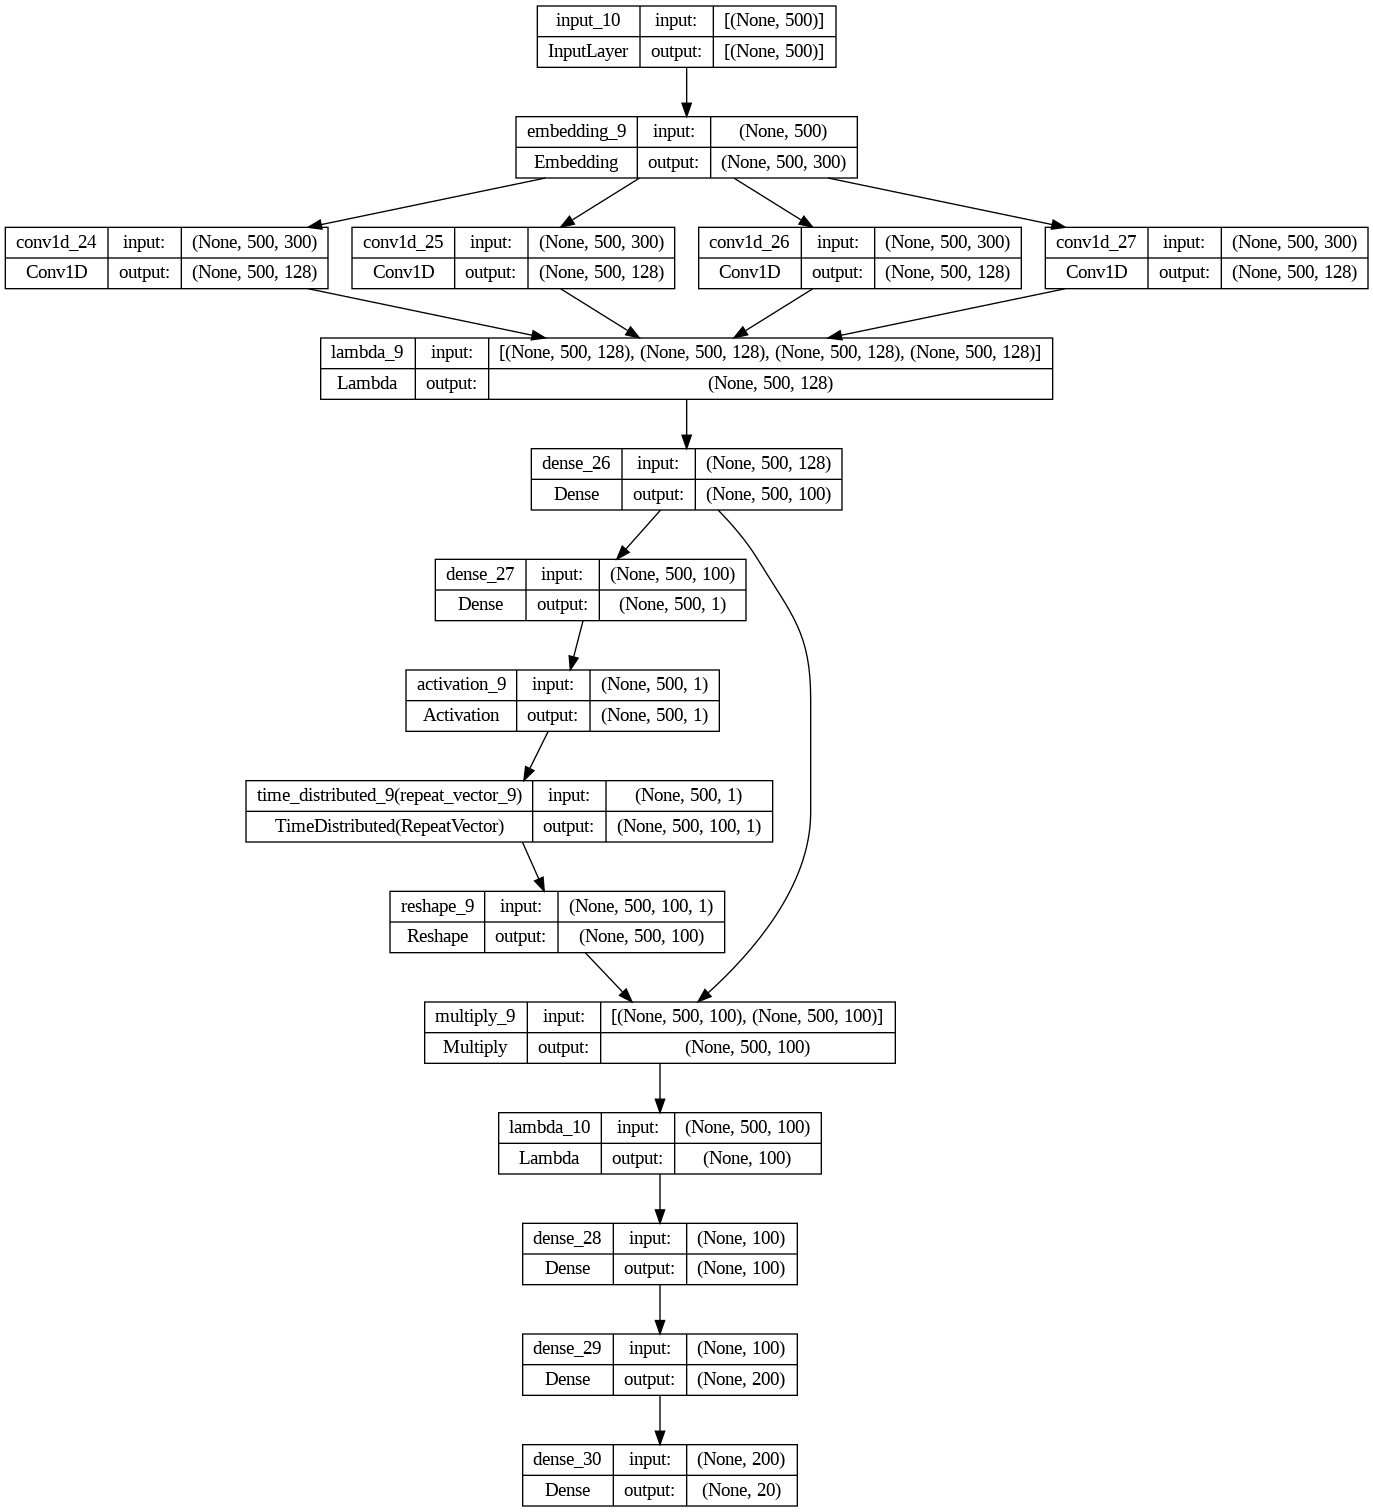

In [47]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [48]:
model.fit(train_sequences, newsgroups_train.target,batch_size=128,epochs=50,validation_split=0.2)

Epoch 1/50
71/71 [==============================] - 32s 336ms/step - loss: 1.6851 - accuracy: 0.4903 - val_loss: 0.6618 - val_accuracy: 0.8016
Epoch 2/50
71/71 [==============================] - 25s 350ms/step - loss: 0.3600 - accuracy: 0.8925 - val_loss: 0.4563 - val_accuracy: 0.8776
Epoch 3/50
71/71 [==============================] - 21s 290ms/step - loss: 0.0901 - accuracy: 0.9756 - val_loss: 0.4404 - val_accuracy: 0.8851
Epoch 4/50
71/71 [==============================] - 22s 315ms/step - loss: 0.0258 - accuracy: 0.9934 - val_loss: 0.4587 - val_accuracy: 0.8962
Epoch 5/50
71/71 [==============================] - 20s 280ms/step - loss: 0.0095 - accuracy: 0.9980 - val_loss: 0.5014 - val_accuracy: 0.8917
Epoch 6/50
71/71 [==============================] - 20s 279ms/step - loss: 0.0056 - accuracy: 0.9989 - val_loss: 0.5262 - val_accuracy: 0.8953
Epoch 7/50
71/71 [==============================] - 23s 316ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.5613 - val_accuracy: 0.8931

KeyboardInterrupt: ignored

Aca estoy usando uan TextCNN como contextualizacion para pasar luego al mecanismo de attention. Fittea rapido a train pero variando hiperparametros no logre que accuracy supere el 0.8. Estimo que ese es el limite del modelo. Agregue y quite capas conv1D paralelas, cambie la cantidad de filtros y su tamaño. Siempre me overfitteo y clava en 0.85 approx. Probe modificar hyperparamtros y cantidad de capas conv y cambios en las densas de salida, pero no parece mejorar demasiado. Lo ultimo que probe fue hacer que el embedding se pueda entrenar, y eso hizo el truco, con eso la accuracy se disparo. Un poco de toqueteo y llegue a 0.90.

Mi idea en un principio era contextualizar con la TextCNN ya que al estar en paralelo, las capas conv poermiten extraer info de varias ventanas de contexto distintar sin perderlas.

# Embeddings + BiDir RNN + attention

In [61]:
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Dense, Input, Concatenate,Dot,RepeatVector,TimeDistributed,Multiply,Lambda,Bidirectional, SimpleRNN, LSTM, Activation, Reshape
import tensorflow.keras.backend as K
from tensorflow.keras.activations import softmax
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers


def softMaxOverTime(x):
    return softmax(x, axis=0)

num_filters = 64
value_dim = 100
nb_words = num_words

# Capa de entrada
input_layer = Input(shape=(max_len,))

# Aplico los embeddings
embedding_layer = Embedding(nb_words, embed_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(input_layer)

# Contextualizador BidirLSTM
lstm_out = Bidirectional(LSTM(value_dim, return_sequences=True, activation="tanh"), merge_mode="concat")(embedding_layer)

# Multiplico por query
ulog_attention = Dense(1, activation="linear")(lstm_out)

# # mecanismo de attention
attention = Activation(softMaxOverTime)(ulog_attention)

# Repito los alfas para poder multiplicar
repeated_attention = TimeDistributed(RepeatVector(value_dim*2))(attention)
repeated_attention = Reshape([max_len, value_dim*2])(repeated_attention)

# Alfa * Keys
weighted_embeddings = Multiply()([repeated_attention, lstm_out])
embedding_sum = Lambda(lambda x: K.sum(x, axis=1))(weighted_embeddings)

# Densas de salida
dense1 = Dense(100, activation='relu', kernel_regularizer=regularizers.L2())(embedding_sum)
dense2 = Dense(20, activation='softmax')(dense1)
model = Model(input_layer , dense2)
adam = optimizers.Nadam(learning_rate=0.005)
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


In [62]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_13 (InputLayer)       [(None, 500)]                0         []                            
                                                                                                  
 embedding_12 (Embedding)    (None, 500, 300)             4024320   ['input_13[0][0]']            
                                                          0                                       
                                                                                                  
 bidirectional_8 (Bidirecti  (None, 500, 200)             320800    ['embedding_12[0][0]']        
 onal)                                                                                            
                                                                                           

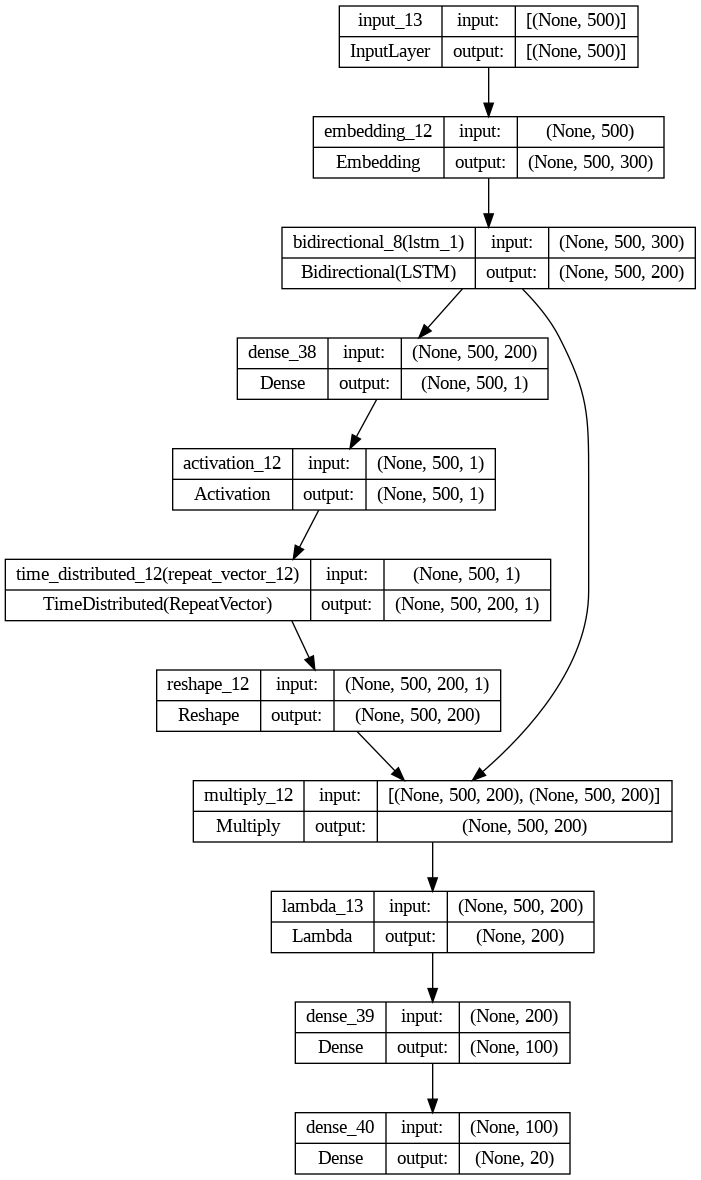

In [63]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [64]:
model.fit(train_sequences, newsgroups_train.target,batch_size=256,epochs=25,validation_split=0.2)

Epoch 1/25
36/36 [==============================] - 103s 498ms/step - loss: 3.1128 - accuracy: 0.1925 - val_loss: 2.0150 - val_accuracy: 0.3712
Epoch 2/25
36/36 [==============================] - 15s 420ms/step - loss: 1.3498 - accuracy: 0.6177 - val_loss: 1.0698 - val_accuracy: 0.6947
Epoch 3/25
36/36 [==============================] - 15s 424ms/step - loss: 0.5810 - accuracy: 0.8777 - val_loss: 0.9969 - val_accuracy: 0.7433
Epoch 4/25
36/36 [==============================] - 14s 387ms/step - loss: 0.2867 - accuracy: 0.9628 - val_loss: 0.6079 - val_accuracy: 0.8652
Epoch 5/25
36/36 [==============================] - 13s 368ms/step - loss: 0.1519 - accuracy: 0.9897 - val_loss: 0.6740 - val_accuracy: 0.8612
Epoch 6/25
36/36 [==============================] - 14s 398ms/step - loss: 0.1109 - accuracy: 0.9939 - val_loss: 0.5958 - val_accuracy: 0.8789
Epoch 7/25
36/36 [==============================] - 13s 372ms/step - loss: 0.0790 - accuracy: 0.9972 - val_loss: 0.5921 - val_accuracy: 0.880

KeyboardInterrupt: ignored

modelo basico con contextualizado de LSTM bidireccional. RNN anda un tanto peor, pero preferi probar estas. Cambiando varios hiperparametros fue dificil hacerla mejorar. En un punto intente agregar a la salida una convolucional que agarre los scores pesados para procesarlos, pero no funco muy bien. Esta estructura tarda una banda en entrenar, por lo que hacerle mejoras cuesta. Subi un tanto el learning rate y mejoro un poco el tiempo, pero sigue tardando una banda. Performa maso si se compara con lo anterior. Lo de antes le pasa el trapo, tarda 1/4 del tiempo en entrenar y saca mas accuracy, un poco triste. Encima overfittea, un loco.

# Observacion

Es un poco penoso, pero un naive bayes da mejor que todos mis modelos:
https://www.kaggle.com/code/arihantjain09/20-groups-best-predictions-and-visuals

De todas formas con esto aprendi una banda. Ahora entiendo attention mucho mejor.

# Ultimas palabras

Primero que nada perdon por entregar tarde. En segundo lugar me gustaria mencionar que los modelos que quedaron aca fueron los que mejor performaron, pero implemente un par de estructuras mas que no sirvieron mucho. Otra observacion que me surgio es sobre el uso de Dropout y Batch Normalization, me pregunto en que casos se puede usar aca, porque estuve pensando y en los casos de attention no se deberia poder.

Viendo algunos trabajos de otras personas vi que este aproach por attention da resultados suboptimos. Vi un naive Bayes con 0.91 o algo asi, lo cual me sorprendio bastante. Reentrenar el modelo junto con los embeddings mejoro bastante el rendimiento, esto tiene sentido, pero no pense que mejoraria de 0.83 a 0.9, muy loco.